# **Downloading Additional Files**



In [1]:
import os
import requests
import zipfile
from tqdm import tqdm  # Progress bar for large downloads

# SharePoint direct download link (replace this with your actual link)
zip_url = "https://livejohnshopkins-my.sharepoint.com/personal/schoi84_jh_edu/_layouts/15/download.aspx?share=EQObtGLKOBxLjhni2Ln0FREBt8cChOLK3zZHo5BO8b2hwg"

# Destination folder
destination_folder = "../ExampleData/"
os.makedirs(destination_folder, exist_ok=True)

# Define ZIP file path
zip_file_path = os.path.join(destination_folder, "example_data.zip")

# Function to download a file with a progress bar
def download_file(url, file_path):
    if os.path.exists(file_path):
        print(f"File already exists: {file_path}")
        return

    print(f"Downloading ZIP file to {file_path}...")
    
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        total_size = int(response.headers.get("content-length", 0))
        with open(file_path, "wb") as file, tqdm(
            desc="Downloading",
            total=total_size,
            unit="B",
            unit_scale=True,
            unit_divisor=1024,
        ) as bar:
            for chunk in response.iter_content(chunk_size=1024):
                file.write(chunk)
                bar.update(len(chunk))
        print("Download complete!")
    else:
        print("Error downloading file. Check your link.")

# Function to extract ZIP file
def extract_zip(zip_path, extract_to):
    print(f"Extracting files to {extract_to}...")
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_to)
    print("Extraction complete!")

# Download the ZIP file
download_file(zip_url, zip_file_path)

# Extract the ZIP file
extract_zip(zip_file_path, destination_folder)


Downloading: 100%|██████████| 1.01G/1.01G [02:49<00:00, 6.40MB/s] 


Download complete!
Extracting files to ../ExampleData/...
Extraction complete!


# Temporal Intensity Analysis

## Core Algorithm
For pixel position $(x,y)$, intensity range calculation:

$$R(x,y) = I_{max}(x,y) - I_{min}(x,y)$$

## Histogram Analysis
Distribution calculation:

$$H(b) = \sum_{x,y} \mathbb{1}_{b}(R(x,y))$$

where $\mathbb{1}_{b}$ is bin indicator function



['../ExampleData/frames\\frame_00000.png', '../ExampleData/frames\\frame_00001.png', '../ExampleData/frames\\frame_00002.png', '../ExampleData/frames\\frame_00003.png', '../ExampleData/frames\\frame_00004.png', '../ExampleData/frames\\frame_00005.png', '../ExampleData/frames\\frame_00006.png', '../ExampleData/frames\\frame_00007.png', '../ExampleData/frames\\frame_00008.png', '../ExampleData/frames\\frame_00009.png', '../ExampleData/frames\\frame_00010.png', '../ExampleData/frames\\frame_00011.png', '../ExampleData/frames\\frame_00012.png', '../ExampleData/frames\\frame_00013.png', '../ExampleData/frames\\frame_00014.png', '../ExampleData/frames\\frame_00015.png', '../ExampleData/frames\\frame_00016.png', '../ExampleData/frames\\frame_00017.png', '../ExampleData/frames\\frame_00018.png', '../ExampleData/frames\\frame_00019.png', '../ExampleData/frames\\frame_00020.png', '../ExampleData/frames\\frame_00021.png', '../ExampleData/frames\\frame_00022.png', '../ExampleData/frames\\frame_000

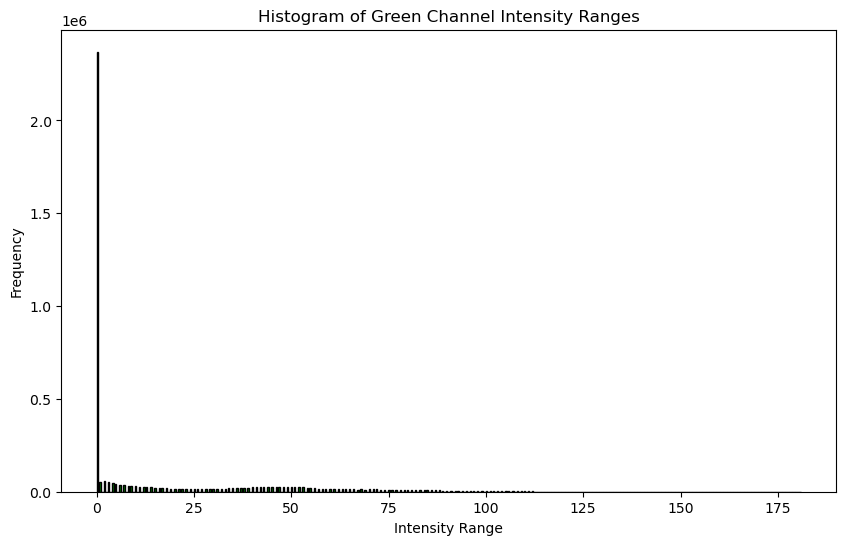

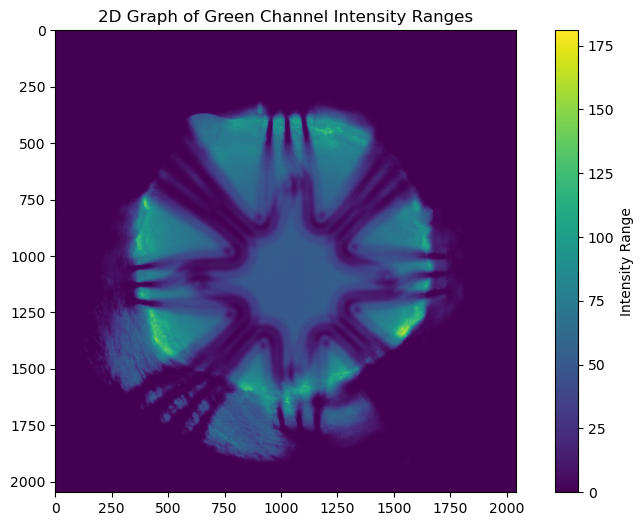

Green channel intensity range computation and plotting completed.


In [2]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

# Path to the frames
frame_path = '../ExampleData/frames/frame_*.png'
frames = sorted(glob.glob(frame_path))

# Limit to the first 500 frames
frames = frames[:500]

# Print the paths of the frames
print(frames)

# Read the first frame to get the dimensions
first_frame = cv2.imread(frames[0])
height, width = first_frame.shape[:2]

# Initialize arrays to store the minimum and maximum intensity values
min_intensity = np.full((height, width), np.inf)
max_intensity = np.full((height, width), -np.inf)

# Loop through the frames and compute the min and max intensity for each pixel
for i, frame_path in enumerate(frames):
    print(f"Processing frame {i+1}/{len(frames)}")
    frame = cv2.imread(frame_path)
    green_channel = frame[:, :, 1]  # Extract the green channel
    
    min_intensity = np.minimum(min_intensity, green_channel)
    max_intensity = np.maximum(max_intensity, green_channel)

# Compute the range for each pixel
intensity_range = max_intensity - min_intensity

# Flatten the intensity range array for the histogram
intensity_range_flat = intensity_range.flatten()

# Plot the histogram of the intensity ranges
plt.figure(figsize=(10, 6))
plt.hist(intensity_range_flat, bins=500, color='green', edgecolor='black')
plt.xlabel('Intensity Range')
plt.ylabel('Frequency')
plt.title('Histogram of Green Channel Intensity Ranges')
plt.show()

# Plot the 2D graph of the intensity ranges
plt.figure(figsize=(10, 6))
plt.imshow(intensity_range, cmap='viridis')
plt.colorbar(label='Intensity Range')
plt.title('2D Graph of Green Channel Intensity Ranges')
plt.show()

print("Green channel intensity range computation and plotting completed.")


# Show Binary Mask 

## Mask Properties
For binary mask $M(x,y)$:

$$M(x,y) \in \{0,1\}$$


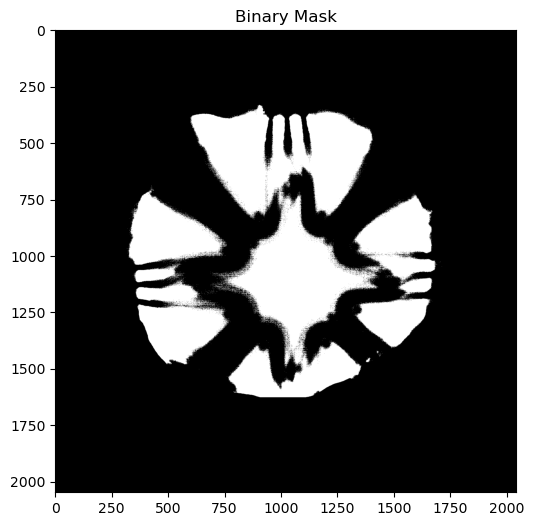

Details for the mask file: final_binary_mask.png
Shape: (2048, 2044)
Data type: uint8
Unique values: [  0 255]


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the binary mask file
binary_mask_path = 'final_binary_mask.png'
binary_mask = cv2.imread(binary_mask_path, cv2.IMREAD_GRAYSCALE)

# Function to display the binary mask and print its details
def display_and_print_details(mask, mask_path):
    # Display the binary mask
    plt.figure(figsize=(10, 6))
    plt.imshow(mask, cmap='gray')
    plt.title('Binary Mask')
    plt.show()

    # Print details about the mask
    print(f"Details for the mask file: {mask_path}")
    print(f"Shape: {mask.shape}")
    print(f"Data type: {mask.dtype}")
    print(f"Unique values: {np.unique(mask)}")

# Display the binary mask and print its details
display_and_print_details(binary_mask, binary_mask_path)


# Latency Analysis

## Key Algorithms

### Threshold Calculation
For signal $s(t)$:

$$T = s_{min} + 0.5(s_{max} - s_{min})$$

### Latency Computation
For each masked pixel $(i,j)$:

1. Region averaging:
$$s_{avg}(t) = \frac{1}{N}\sum_{x=i-10}^{i+10}\sum_{y=j-10}^{j+10} s(x,y,t)$$

2. Cubic interpolation to new sampling rate:
$$s_{interp}(t) = \text{cubic\_spline}(t, s_{avg}(t))$$

3. Latency determination:
$$L(i,j) = \min\{t : s_{interp}(t) \geq T\}$$

4. Final latency in ms:
$$L_{ms}(i,j) = (L(i,j) - \min_{x,y}L(x,y)) \times 1000$$

## Implementation Notes
- Frame rate: 60 Hz
- Interpolation: 1000 Hz
- ROI: 20×20 pixel window
- Mask value: 255 for valid pixels

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pickle
%matplotlib inline
# Load the binary mask file
binary_mask_path = 'final_binary_mask.png'
binary_mask = cv2.imread(binary_mask_path, cv2.IMREAD_GRAYSCALE)

# Ensure the mask and intensity range have the same shape
if binary_mask.shape != intensity_range.shape:
    raise ValueError("The mask and intensity range do not have the same shape.")

# Limit to the first 500 frames
frames = frames[:500]

# Read the first frame to get the dimensions
first_frame = cv2.imread(frames[0])
height, width = first_frame.shape[:2]

# Initialize a 3D array to store the green channel intensity values
num_frames = min(len(frames), 80)
frames_data = np.zeros((height, width, num_frames), dtype=np.float32)

# Loop through the frames and extract the green channel intensity
for i, frame_path in enumerate(frames[:num_frames]):
    print(f"Processing frame {i+1}/{num_frames}")
    frame = cv2.imread(frame_path)
    green_channel = frame[:, :, 1]  # Extract the green channel
    frames_data[:, :, i] = green_channel



Processing frame 1/80
Processing frame 2/80
Processing frame 3/80
Processing frame 4/80
Processing frame 5/80
Processing frame 6/80
Processing frame 7/80
Processing frame 8/80
Processing frame 9/80
Processing frame 10/80
Processing frame 11/80
Processing frame 12/80
Processing frame 13/80
Processing frame 14/80
Processing frame 15/80
Processing frame 16/80
Processing frame 17/80
Processing frame 18/80
Processing frame 19/80
Processing frame 20/80
Processing frame 21/80
Processing frame 22/80
Processing frame 23/80
Processing frame 24/80
Processing frame 25/80
Processing frame 26/80
Processing frame 27/80
Processing frame 28/80
Processing frame 29/80
Processing frame 30/80
Processing frame 31/80
Processing frame 32/80
Processing frame 33/80
Processing frame 34/80
Processing frame 35/80
Processing frame 36/80
Processing frame 37/80
Processing frame 38/80
Processing frame 39/80
Processing frame 40/80
Processing frame 41/80
Processing frame 42/80
Processing frame 43/80
Processing frame 44/

Processing row 1/2048
Processing row 2/2048
Processing row 3/2048
Processing row 4/2048
Processing row 5/2048
Processing row 6/2048
Processing row 7/2048
Processing row 8/2048
Processing row 9/2048
Processing row 10/2048
Processing row 11/2048
Processing row 12/2048
Processing row 13/2048
Processing row 14/2048
Processing row 15/2048
Processing row 16/2048
Processing row 17/2048
Processing row 18/2048
Processing row 19/2048
Processing row 20/2048
Processing row 21/2048
Processing row 22/2048
Processing row 23/2048
Processing row 24/2048
Processing row 25/2048
Processing row 26/2048
Processing row 27/2048
Processing row 28/2048
Processing row 29/2048
Processing row 30/2048
Processing row 31/2048
Processing row 32/2048
Processing row 33/2048
Processing row 34/2048
Processing row 35/2048
Processing row 36/2048
Processing row 37/2048
Processing row 38/2048
Processing row 39/2048
Processing row 40/2048
Processing row 41/2048
Processing row 42/2048
Processing row 43/2048
Processing row 44/20

<Figure size 800x600 with 0 Axes>

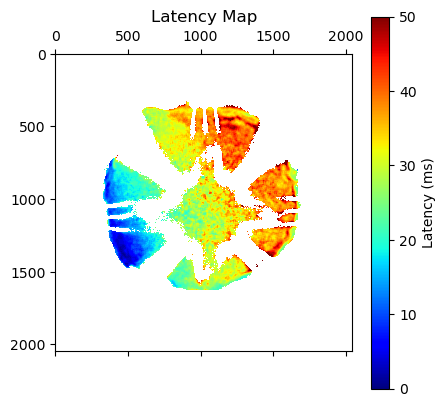

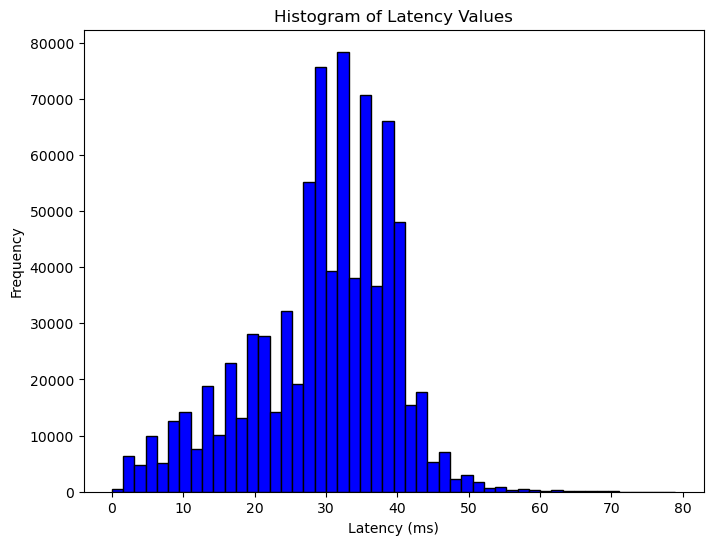

Green channel intensity range computation and plotting completed.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import os
import pickle
from scipy.interpolate import interp1d

# Your existing code for loading the mask, intensity range, and frames remains unchanged

# Function to calculate latency based on threshold
def calculate_latency(data, frame_rate, fs_new=1000):
    height, width, num_frames = data.shape
    latencies = np.zeros((height, width))
    for i in range(height):
        print(f"Processing row {i+1}/{height}")
        for j in range(width):
            if binary_mask[i, j] == 255:  # Only process pixels within the mask
                channel_data = data[i-10:i+10, j-10:j+10, 30:]
                channel_data = np.mean(channel_data, axis=(0, 1))
                
                # Original time points
                t_orig = np.linspace(0, (len(channel_data) - 1) / frame_rate, len(channel_data))
                
                # New time points for interpolation
                t_new = np.linspace(0, t_orig[-1], int(t_orig[-1] * fs_new))
                
                # Cubic interpolation
                f_interp = interp1d(t_orig, channel_data, kind='cubic', fill_value="extrapolate")
                channel_data_interp = f_interp(t_new)
                
                min_val = np.min(channel_data_interp)
                max_val = np.max(channel_data_interp)
                threshold = min_val + 0.5 * (max_val - min_val)
                exceeding_indices = np.where(channel_data_interp >= threshold)[0]
                if exceeding_indices.size > 0:
                    latency_index = exceeding_indices[0]
                else:
                    latency_index = -1  # If threshold is never exceeded
                latency_time = latency_index / fs_new
                latencies[i, j] = latency_time
            else:
                latencies[i, j] = np.nan  # Use NaN for pixels outside the mask
    return latencies

# Example frame rate (replace with actual frame rate)
frame_rate = 60.0

# Calculate latencies
latencies = calculate_latency(frames_data, frame_rate, fs_new=1000)
latencies = (latencies - np.nanmin(latencies)) * 1000  # in ms

# Display the latency map
plt.figure(figsize=(8, 6))
plt.matshow(latencies, cmap='jet',vmin=0, vmax=50)
plt.colorbar(label='Latency (ms)')
plt.title('Latency Map')
plt.show()

# Plot the histogram of latency values, ignoring NaNs
plt.figure(figsize=(8, 6))
plt.hist(latencies[np.isfinite(latencies)], bins=50, color='blue', edgecolor='black')
plt.xlabel('Latency (ms)')
plt.ylabel('Frequency')
plt.title('Histogram of Latency Values')
plt.show()

print("Green channel intensity range computation and plotting completed.")


Store The latency (Optional)

In [6]:

import pickle



# Save latencies to a file named video_latency.pkl using pickle
with open('video_latency.pkl', 'wb') as file:
    pickle.dump(latencies, file)

# Load the latencies from the file
with open('video_latency.pkl', 'rb') as file:
    loaded_latencies = pickle.load(file)

print(loaded_latencies)


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [7]:
import pickle

import numpy as np
from scipy.optimize import curve_fit
from tqdm import tqdm
import pandas as pd
# Load the latencies from the file
with open('video_latency.pkl', 'rb') as file:
    latencies_video = pickle.load(file)

print(latencies_video.shape)

latencies_video_01ms = latencies_video*10



(2048, 2044)


# Max Pooling Implementation

## Max Pool Operation
For input matrix $A$ with kernel size $k$:

$$P_{ij} = \max_{m,n}\{A_{k\cdot i+m,k\cdot j+n}\}$$
where $m,n \in [0,k-1]$

## NaN Handling
- If any value in kernel window is NaN:
  $$P_{ij} = \text{NaN}$$
- Otherwise:
  $$P_{ij} = \max(\{A_{k\cdot i+m,k\cdot j+n} | m,n \in [0,k-1]\})$$

# 2D Polynomial Fitting

## Polynomial Function
For spatial coordinates $(x,y)$:

$$T(x,y) = a + bx + cy + dx^2 + exy + fy^2$$

where:
- $a$: baseline offset
- $b,c$: linear terms
- $d,e,f$: quadratic terms

## Implementation
```python
def polynomial_func(xy, a, b, c, d, e, f):
    x, y = xy
    return a + b*x + c*y + d*x**2 + e*x*y + f*y**2
```

## Fit Conditions
- Minimum points: 6 (required for 6 coefficients)
- Uses `scipy.optimize.curve_fit`
- Returns coefficients: $[a,b,c,d,e,f]$

In [8]:
import numpy as np
from scipy.optimize import curve_fit
from tqdm import tqdm

def max_pool_2d(A, kernel_size):
    # Pad the array if it's not divisible by kernel_size
    m, n = A.shape
    pad_m = (kernel_size - m % kernel_size) % kernel_size
    pad_n = (kernel_size - n % kernel_size) % kernel_size
    A_padded = np.pad(A, ((0, pad_m), (0, pad_n)), mode='constant', constant_values=np.nan)
    
    # Reshape and find max
    m_pooled, n_pooled = A_padded.shape
    A_reshaped = A_padded.reshape(m_pooled // kernel_size, kernel_size, n_pooled // kernel_size, kernel_size)
    
    # If any value in the pool is NaN, the result is NaN
    has_nan = np.isnan(A_reshaped).any(axis=(1, 3))
    
    # Compute max ignoring NaNs
    max_values = np.nanmax(A_reshaped, axis=(1, 3))
    
    # Set pools with NaNs to NaN
    max_values[has_nan] = np.nan
    
    return max_values

def polynomial_func(xy, a, b, c, d, e, f):
    x, y = xy
    return a + b*x + c*y + d*x**2 + e*x*y + f*y**2

D:\temp\ipykernel_12112\201093690.py:20: RuntimeWarning: All-NaN slice encountered
  max_values = np.nanmax(A_reshaped, axis=(1, 3))
Calculating CV: 100%|██████████| 167690/167690 [02:26<00:00, 1148.37it/s] 


Mean conduction velocity: 10.660374530259991 cm/s


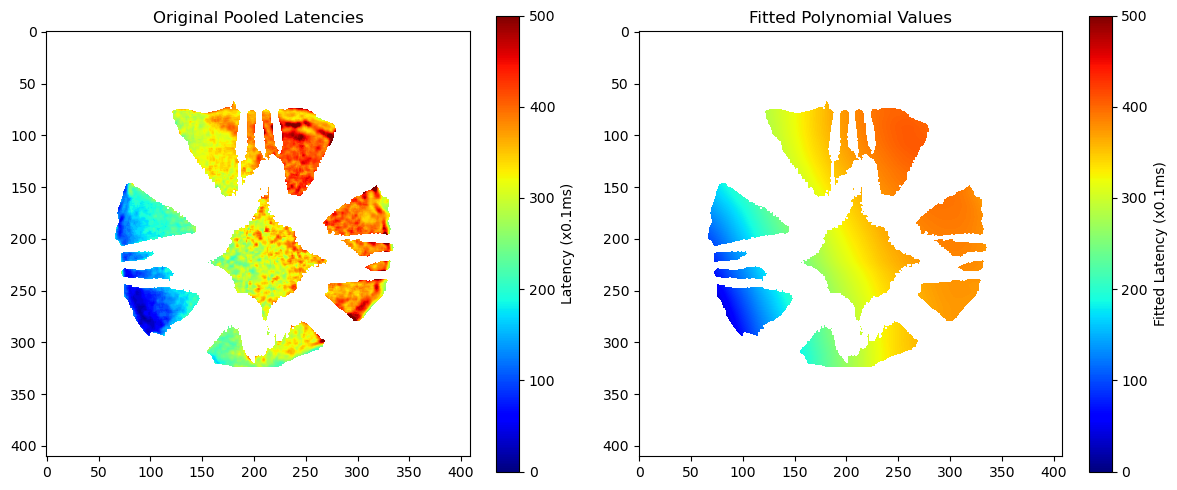

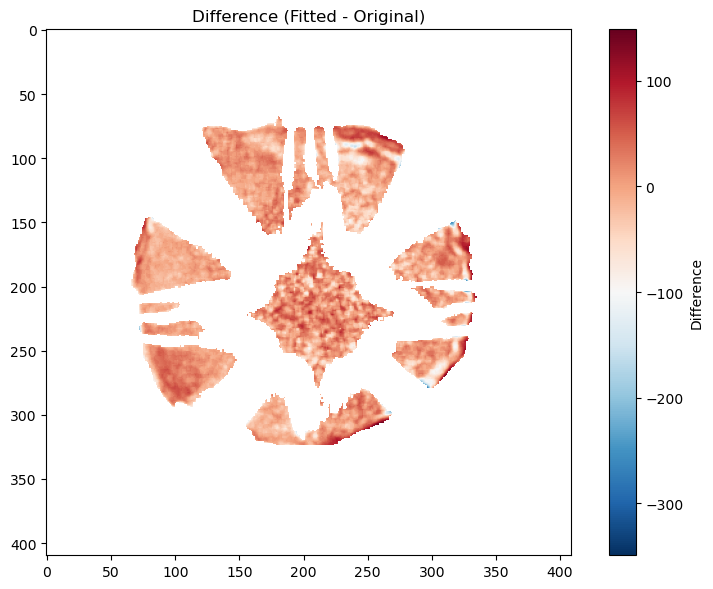

In [9]:
import numpy as np
from scipy.optimize import curve_fit
from tqdm import tqdm
import matplotlib.pyplot as plt

# ... (keep the previous functions as they are) ...

def calculate_cv(latencies_video, spatial_resolution_mm=1, time_resolution_ms=1, window_size_mm=4, pool_size=10):
    # Perform max pooling
    latencies_pooled = max_pool_2d(latencies_video, pool_size)
    
    # Update spatial resolution
    spatial_resolution_mm *= pool_size
    
    rows, cols = latencies_pooled.shape
    cv_x = np.zeros_like(latencies_pooled)
    cv_y = np.zeros_like(latencies_pooled)
    
    # Create arrays to store fitted values for visualization
    fitted_values = np.full_like(latencies_pooled, np.nan)
    
    # Convert window size from mm to pixels
    window_size_px = max(1, int(window_size_mm / spatial_resolution_mm))
    
    # Create progress bar
    total_pixels = rows * cols
    pbar = tqdm(total=total_pixels, desc="Calculating CV")

    for i in range(rows):
        for j in range(cols):
            if np.isnan(latencies_pooled[i, j]):
                pbar.update(1)
                continue
            
            # Define the local window
            x_min, x_max = max(0, i-window_size_px), min(rows, i+window_size_px+1)
            y_min, y_max = max(0, j-window_size_px), min(cols, j+window_size_px+1)
            
            # Get local coordinates and latencies
            y_local, x_local = np.meshgrid(np.arange(y_min-j, y_max-j), 
                                           np.arange(x_min-i, x_max-i))
            t_local = latencies_pooled[x_min:x_max, y_min:y_max]
            
            # Ensure all arrays have the same shape
            x_local = x_local.flatten()
            y_local = y_local.flatten()
            t_local = t_local.flatten()
            
            # Remove NaN values
            mask = ~np.isnan(t_local)
            x_local, y_local, t_local = x_local[mask], y_local[mask], t_local[mask]
            
            if len(t_local) < 6:  # Need at least 6 points for the fit
                pbar.update(1)
                continue
            
            # Prepare arrays for curve fitting
            xy_local = np.vstack((x_local, y_local))
            
            # Fit the polynomial
            try:
                popt, _ = curve_fit(polynomial_func, xy_local, t_local)
            except:
                pbar.update(1)
                continue
            
            # Calculate partial derivatives
            dT_dx = popt[1] + 2*popt[3]*0 + popt[4]*0  # at x,y = 0,0
            dT_dy = popt[2] + popt[4]*0 + 2*popt[5]*0  # at x,y = 0,0
            
            # Calculate velocity components
            denominator_x = dT_dx + dT_dx * dT_dy**2
            denominator_y = dT_dy + dT_dy * dT_dx**2
            
            if denominator_x != 0:
                cv_x[i, j] = (1 + dT_dy**2) / denominator_x
            if denominator_y != 0:
                cv_y[i, j] = (1 + dT_dx**2) / denominator_y
            
            # Store fitted value for visualization
            fitted_values[i, j] = polynomial_func([0, 0], *popt)
            
            pbar.update(1)
    
    pbar.close()
    
    # Convert to actual velocities (mm/ms)
    cv_x *= spatial_resolution_mm / time_resolution_ms
    cv_y *= spatial_resolution_mm / time_resolution_ms
    
    # Calculate speed
    cv_magnitude = np.sqrt(cv_x**2 + cv_y**2)
    
    return cv_x, cv_y, cv_magnitude, fitted_values, latencies_pooled

# Usage
pool_size = 5             # 10x10 pooling
spatial_resolution_mm = 0.8249  # 1 um per pixel
time_resolution_ms = 1     # 1 0.1 ms per time unit
window_size_mm = 600        # um window, as suggested in the paper

cv_x, cv_y, cv_magnitude, fitted_values, latencies_pooled = calculate_cv(latencies_video_01ms, 
                                        spatial_resolution_mm=spatial_resolution_mm,
                                        time_resolution_ms=time_resolution_ms,
                                        window_size_mm=window_size_mm,
                                        pool_size=pool_size)

# Print mean conduction velocity
print(f"Mean conduction velocity: {np.nanmean(cv_magnitude)} cm/s")

# Visualize the fitted polynomial
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.title("Original Pooled Latencies")
im1 = plt.imshow(latencies_pooled, cmap='jet', vmin=0, vmax=500)
plt.colorbar(im1, label='Latency (x0.1ms)')

plt.subplot(122)
plt.title("Fitted Polynomial Values")
im2 = plt.imshow(fitted_values, cmap='jet', vmin=0, vmax=500)
plt.colorbar(im2, label='Fitted Latency (x0.1ms)')

plt.tight_layout()
plt.show()

# Visualize the difference
plt.figure(figsize=(8, 6))
plt.title("Difference (Fitted - Original)")
difference = fitted_values - latencies_pooled
im3 = plt.imshow(difference, cmap='RdBu_r')
plt.colorbar(im3, label='Difference')
plt.tight_layout()
plt.show()

In [10]:
plt.imshow(fitted_values, cmap='jet', vmin=0, vmax=500)
plt.axis('off')  # Remove axis labels and ticks

# Save the figure with high resolution and no padding
output_path = 'CalciumFitted.png'
plt.savefig(output_path, dpi=600, bbox_inches='tight', pad_inches=0, transparent=True)
plt.close()



# Polynomial Fitting with Mask

## Key Differences
- Uses whole organoid mask ('MaskWholeCalcium.png')

## Core Operation
Same polynomial fitting as before:
$$T(x,y) = a + bx + cy + dx^2 + exy + fy^2$$

But applied only where:
$$M_{valid}(i,j) = \text{True}$$

D:\temp\ipykernel_12112\201093690.py:20: RuntimeWarning: All-NaN slice encountered
  max_values = np.nanmax(A_reshaped, axis=(1, 3))
Fitting Polynomial: 100%|██████████| 54852/54852 [04:58<00:00, 183.59it/s]


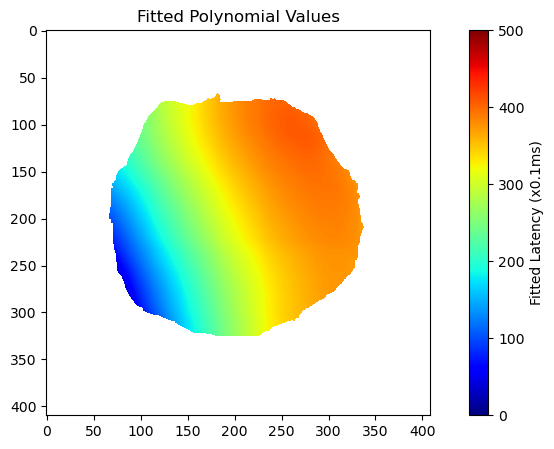

In [11]:
import numpy as np
from scipy.optimize import curve_fit
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
def calculate_fitted_values(latencies_video, mask_path, spatial_resolution_mm=1, window_size_mm=4, pool_size=10):
    # Perform max pooling to reduce resolution
    latencies_pooled = max_pool_2d(latencies_video, pool_size)
    
    # Update spatial resolution
    spatial_resolution_mm *= pool_size
    
    rows, cols = latencies_pooled.shape
    fitted_values = np.full_like(latencies_pooled, np.nan)

    # Convert window size from mm to pixels
    window_size_px = max(1, int(window_size_mm / spatial_resolution_mm))

    # Load custom mask (MaskWholeCalcium)
    final_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if final_mask is None:
        raise ValueError("Invalid mask size or file not found.")

    # Resize the mask to match the pooled latency dimensions
    final_mask_resized = cv2.resize(final_mask, (cols, rows), interpolation=cv2.INTER_NEAREST)

    # Create a new valid region based on the resized mask
    mask_valid = final_mask_resized > 0  # Areas with 255 are valid

    # Do not modify latencies_pooled based on NaNs; instead, rely solely on the new mask
    valid_pixels = mask_valid.flatten()

    # Create progress bar
    total_pixels = np.count_nonzero(mask_valid)
    pbar = tqdm(total=total_pixels, desc="Fitting Polynomial")

    for i in range(rows):
        for j in range(cols):
            if not mask_valid[i, j]:  # Skip if outside the mask
                continue

            # Define the local window
            x_min, x_max = max(0, i - window_size_px), min(rows, i + window_size_px + 1)
            y_min, y_max = max(0, j - window_size_px), min(cols, j + window_size_px + 1)

            # Get local coordinates and latencies
            y_local, x_local = np.meshgrid(np.arange(y_min - j, y_max - j), 
                                           np.arange(x_min - i, x_max - i))
            t_local = latencies_pooled[x_min:x_max, y_min:y_max]

            # Flatten arrays
            x_local = x_local.flatten()
            y_local = y_local.flatten()
            t_local = t_local.flatten()

            # Remove NaN values from local window
            mask = ~np.isnan(t_local)
            x_local, y_local, t_local = x_local[mask], y_local[mask], t_local[mask]

            if len(t_local) < 6:  # Need at least 6 points for curve fitting
                continue

            # Prepare data for curve fitting
            xy_local = np.vstack((x_local, y_local))

            # Fit the polynomial
            try:
                popt, _ = curve_fit(polynomial_func, xy_local, t_local)
                # Store the fitted value at the current pixel position
                fitted_values[i, j] = polynomial_func([0, 0], *popt)
            except:
                continue

            pbar.update(1)

    pbar.close()
    
    return fitted_values, latencies_pooled
mask_path = 'MaskWholeCalcium.png'
spatial_resolution_mm = 0.8249  
window_size_mm = 600  
pool_size = 5  

fitted_values, latencies_pooled = calculate_fitted_values(
    latencies_video_01ms, 
    mask_path,
    spatial_resolution_mm=spatial_resolution_mm,
    window_size_mm=window_size_mm,
    pool_size=pool_size
)

# Display the fitted polynomial values
plt.figure(figsize=(10, 5))
plt.title("Fitted Polynomial Values")
plt.imshow(fitted_values, cmap='jet', vmin=0, vmax=500)
plt.colorbar(label='Fitted Latency (x0.1ms)')
plt.show()


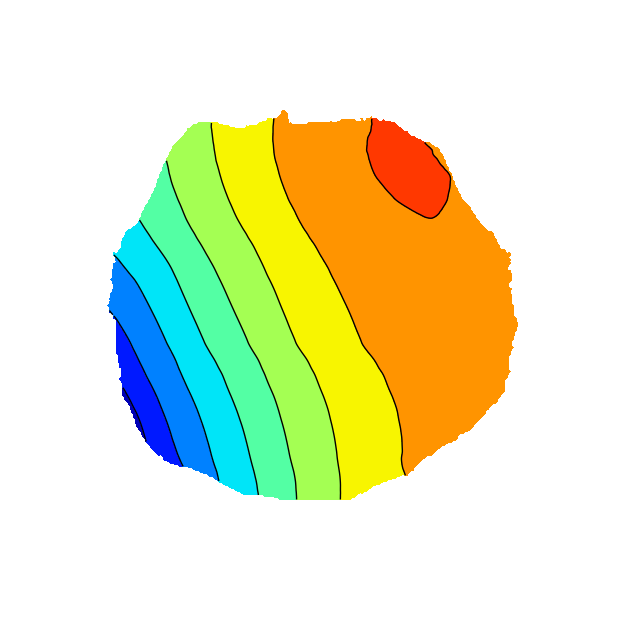

In [12]:
import matplotlib.pyplot as plt
height, width = fitted_values.shape

# Create a meshgrid for contour plotting
x = np.arange(width)
y = np.arange(height)
X, Y = np.meshgrid(x, y)
Y = np.flipud(Y)  # Flip the Y-axis as requested

# Create the plot without axis, labels, and colorbar
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')  # Equal aspect ratio

# Plot contour with jet colormap
contour = ax.contourf(X, Y, fitted_values/10, levels=np.linspace(0, 50, num=11), cmap='jet')
contour_lines = ax.contour(X, Y, fitted_values/10, levels=np.linspace(0, 50, num=11), colors='black', linewidths=1)
#ax.clabel(contour_lines, inline=True, fontsize=8)  # Add contour labels with font size 8

# Remove axis, ticks, and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Save the figure with high resolution (1200 dpi)
output_path = 'CalciumWholeContour_0_50ms.png'
plt.show()
save = False
if save:
    plt.savefig(output_path, dpi=1200, bbox_inches='tight', pad_inches=0, transparent=True)

    # Close the plot to free memory
    plt.close(fig)

    print(f"Contour plot saved as '{output_path}' at 1200 DPI without axis and labels.")